<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ariadna Desirée Galindo Marín y Miguel de Jesus Aguirre Orozco.

**Fecha:** 14 de octubre del 2020.

**Expediente** : 718272 y 722961.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 13
    

Enlace Github 
- https://github.com/miguelaguirre11/TareasSimulacion

>1. Suponer que  𝑇  distribuye beta donde la media es  $\mu_p$  y varianza  $\sigma_p^2$  y responder cual es la probabilidad  $P(T\leq d)$ .
    For a generalized Beta distribution defined on the interval [a,b], you have the relations :
    $$\mu=\frac{a\beta+b\alpha}{\alpha+\beta}, \sigma^2=\frac{\alpha\beta(b-a)^2}{(\alpha+\beta)^2(1+\alpha+\beta)}$$

Ayuda: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve

Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.
    

In [1]:
#importamos librerias necesarias
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np
from scipy.stats import beta,triang

%matplotlib inline

- Solucion Ariadna: 

Alpha: 52.199999999494004
Beta: 121.79999999957195
Pb(T<=d)= 0.8318988889559991


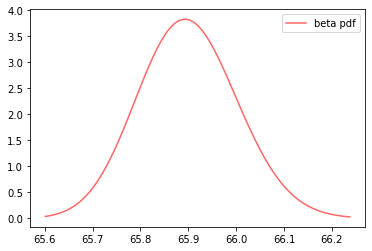

In [2]:
#parámetros
a=50 #optimista
b=100 #pesímista
mu=65
sigma=np.sqrt(9)
#función para resolver las ecuaciones
def f(z):
    alpha, beta=z
    f1 = ((a * beta + b * alpha)/(alpha + beta)) - mu
    f2 = ((alpha*beta*(b - a)**2) / (((alpha + beta)**2)*(1 + alpha + beta))) - sigma
    return [f1, f2]
#resolvemos las ecuaciones
alpha, beta = fsolve(f, [1, 1])
print(f'Alpha: {alpha}\nBeta: {beta}')
#obtenemos la distribución y probabilidad
d=66
P_beta = st.beta(alpha, beta, loc=mu, scale=sigma).cdf(d)
print('Pb(T<=d)=',P_beta)
#graficamos
fig, ax = plt.subplots(1, 1)
def plot_dist_beta(alpha,beta,mu,sigma):
    x=np.linspace(st.beta.ppf(0.001,alpha,beta,loc=mu,scale=sigma),
                 st.beta.ppf(0.999,alpha,beta,loc=mu,scale=sigma),100)
    ax.plot(x,st.beta.pdf(x,alpha,beta,loc=mu,scale=sigma),
           'r-',alpha=0.6,label='beta pdf')
    plt.legend()
    
plot_dist_beta(alpha,beta,mu,sigma)

- Solución Miguel:

In [24]:
# Límites 

down = 40
up = 49 

# Estadísticas 

m = 44 
sigma = np.sqrt(9)

# Valor para calcular probabilidad
p = 47

#Función Griegas

def griegas(g):
    a = g[0]
    b = g[1]

    alpha = ((down * b + up * a) / (a + b)) - m
    betha = ((a * b) * (up - down)**2) / (((a + b)**2) * (1 + a + b)) - sigma**2
    return np.array([alpha, betha])


greek = np.array([1,1])
G = fsolve(griegas, greek)
A = G[0]
B = G[1]


prob = beta.cdf(p, A, B, scale = (up - down), loc = down)

print('La Alpha es: ', A, ', mientras que la Betha es: ', B,' y P(T<=d)', prob * 100, '%')

La Alpha es:  0.5432098765398357 , mientras que la Betha es:  0.6790123456890043  y P(T<=d) 76.77251926284654 %


>2. Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.

- Solución Ariadna:

Pt(T<=d)= 0.9111111111111111


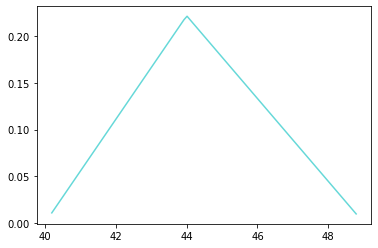

In [5]:
#parámetros
p=49#pesimista 
o=40#optimista
mu=44#moda
i=(mu-o)/(p-o)
d=47
#graficamos
fig, ax = plt.subplots(1, 1)
loc=o # Izquierda
scale=(p-o) # Derecha - Izquierda

#distribución y probabilidad
P_triang = st.triang(i, loc=loc, scale=scale).cdf(d)
print('Pt(T<=d)=',P_triang)

x = np.linspace(st.triang.ppf(0.001, i, loc=loc, scale=scale),
                st.triang.ppf(0.999, i, loc=loc, scale=scale), 
                100)
ax.plot(x, st.triang.pdf(x, i, loc=loc, scale=scale), 
        'c-', alpha=0.6, label='Triangular pdf')

- Solución Miguel

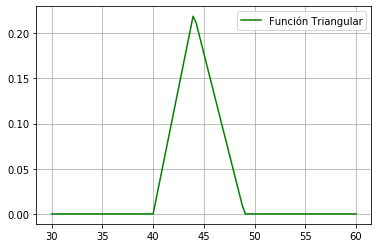

In [33]:
x = np.linspace(30,60, 100)
c = 4 / 9

plt.plot(x,st.triang.pdf(x, c, loc = down,scale = (up - down)),
         'g-', label='Función Triangular')

plt.legend(loc='best')
plt.grid()
plt.show()

In [37]:
prob2 = triang.cdf(p, c, loc = down, scale = (up - down))
print('P(T<=d) es: ', prob2 * 100, '%')

P(T<=d) es:  91.11111111111111 %
